In [65]:
#import edilmesi gerekenleri ettik
#csv dosyasını yükledik ve tanımladık

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv("/kaggle/input/grad-project-eylulkiic/final_data.csv")

/kaggle/input/grad-project-eylulkiic/final_data.csv


In [66]:
#yazarken bana yardımcı olması için boşlukları temizledim
df.columns = df.columns.str.strip()

In [67]:
#bütün verimizi yazdırdık
print(df)

     Unnamed: 0.1  Unnamed: 0  Age     Sex  Job Housing Saving accounts  \
0               0           0   67    male    2     own             NaN   
1               1           1   22  female    2     own          little   
2               2           2   49    male    1     own          little   
3               3           3   45    male    2    free          little   
4               4           4   53    male    2    free          little   
..            ...         ...  ...     ...  ...     ...             ...   
995           995         995   31  female    1     own          little   
996           996         996   40    male    3     own          little   
997           997         997   38    male    2     own          little   
998           998         998   23    male    2    free          little   
999           999         999   27    male    2     own        moderate   

    Checking account  Credit amount  Duration              Purpose  Risk  
0             little    

In [68]:
#verimiz hakkında özet aldık
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0.1      1000 non-null   int64 
 1   Unnamed: 0        1000 non-null   int64 
 2   Age               1000 non-null   int64 
 3   Sex               1000 non-null   object
 4   Job               1000 non-null   int64 
 5   Housing           1000 non-null   object
 6   Saving accounts   817 non-null    object
 7   Checking account  606 non-null    object
 8   Credit amount     1000 non-null   int64 
 9   Duration          1000 non-null   int64 
 10  Purpose           1000 non-null   object
 11  Risk              1000 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 93.9+ KB


In [69]:
#verileri görselleştirmeden önce eksik verileri temizlemeli veya doldurmalıyız
#tüm eksikleri sütun bazında görelim
print(df.isnull().sum())

Unnamed: 0.1          0
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [70]:
#saving accounts ve checking accountta bulunan eksikleri mod ile dolduruyorum (kategorik değişken olduğu için)

df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode()[0])
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode()[0])

print(df)

     Unnamed: 0.1  Unnamed: 0  Age     Sex  Job Housing Saving accounts  \
0               0           0   67    male    2     own          little   
1               1           1   22  female    2     own          little   
2               2           2   49    male    1     own          little   
3               3           3   45    male    2    free          little   
4               4           4   53    male    2    free          little   
..            ...         ...  ...     ...  ...     ...             ...   
995           995         995   31  female    1     own          little   
996           996         996   40    male    3     own          little   
997           997         997   38    male    2     own          little   
998           998         998   23    male    2    free          little   
999           999         999   27    male    2     own        moderate   

    Checking account  Credit amount  Duration              Purpose  Risk  
0             little    

In [71]:
#eksikler tamamen temizlenmiş mi yeniden kontrol ediyorum
print(df.isnull().sum())

Unnamed: 0.1        0
Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


In [72]:
#saving account ve checking account verilerini sayısal verilere dönüştürdüm 
mapping = {"unknown": 0, "little": 1, "moderate": 2, "rich": 3}
df["Saving accounts"] = df["Saving accounts"].map(mapping)
df["Checking account"] = df["Checking account"].map(mapping)
print(df)

     Unnamed: 0.1  Unnamed: 0  Age     Sex  Job Housing  Saving accounts  \
0               0           0   67    male    2     own              1.0   
1               1           1   22  female    2     own              1.0   
2               2           2   49    male    1     own              1.0   
3               3           3   45    male    2    free              1.0   
4               4           4   53    male    2    free              1.0   
..            ...         ...  ...     ...  ...     ...              ...   
995           995         995   31  female    1     own              1.0   
996           996         996   40    male    3     own              1.0   
997           997         997   38    male    2     own              1.0   
998           998         998   23    male    2    free              1.0   
999           999         999   27    male    2     own              2.0   

     Checking account  Credit amount  Duration              Purpose  Risk  
0          

In [73]:
#sex, purpose ve housing verilerini sayısal değerlere dönüştürüyorum

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

df = pd.get_dummies(df, columns=["Housing", "Purpose"], drop_first=True)

# verinin son halini görelim (sütun sayısı artmış olacak)
print(df.head())

   Unnamed: 0.1  Unnamed: 0  Age  Sex  Job  Saving accounts  Checking account  \
0             0           0   67    0    2              1.0                 1   
1             1           1   22    1    2              1.0                 2   
2             2           2   49    0    1              1.0                 1   
3             3           3   45    0    2              1.0                 1   
4             4           4   53    0    2              1.0                 1   

   Credit amount  Duration  Risk  Housing_own  Housing_rent  Purpose_car  \
0           1169         6     1         True         False        False   
1           5951        48     0         True         False        False   
2           2096        12     1         True         False        False   
3           7882        42     1        False         False        False   
4           4870        24     0        False         False         True   

   Purpose_domestic appliances  Purpose_education  \
0  

In [74]:
#eksik veriler temizlendiği için veri görselleştirme adımına geçiyorum

In [75]:
#şimdi ölçeklendirme yapacağım. StandardScale sayısal verileri standart normal dağılıma dönüştürmek için kullanılır.değişkenlerin ortalamasını 0’a, standart sapmasını ise 1’e çeker. örneğin Age 0-100 arasında değer alıyor. Credit Amount 1000’ler veya 10.000’ler düzeyinde olduğu için bu farklılıklar modelde dengesizliğine yol açabilir, bu nedenle ölçekleme yapılır.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Credit amount', 'Duration']] = scaler.fit_transform(df[['Age', 'Credit amount', 'Duration']])

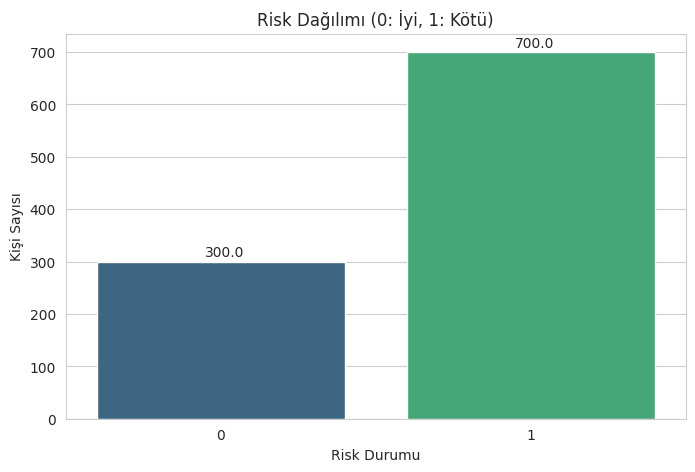

In [76]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

ax = sns.countplot(x="Risk", data=df, palette="viridis")
plt.title("Risk Dağılımı (0: İyi, 1: Kötü)")
plt.xlabel("Risk Durumu")
plt.ylabel("Kişi Sayısı")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 10))
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


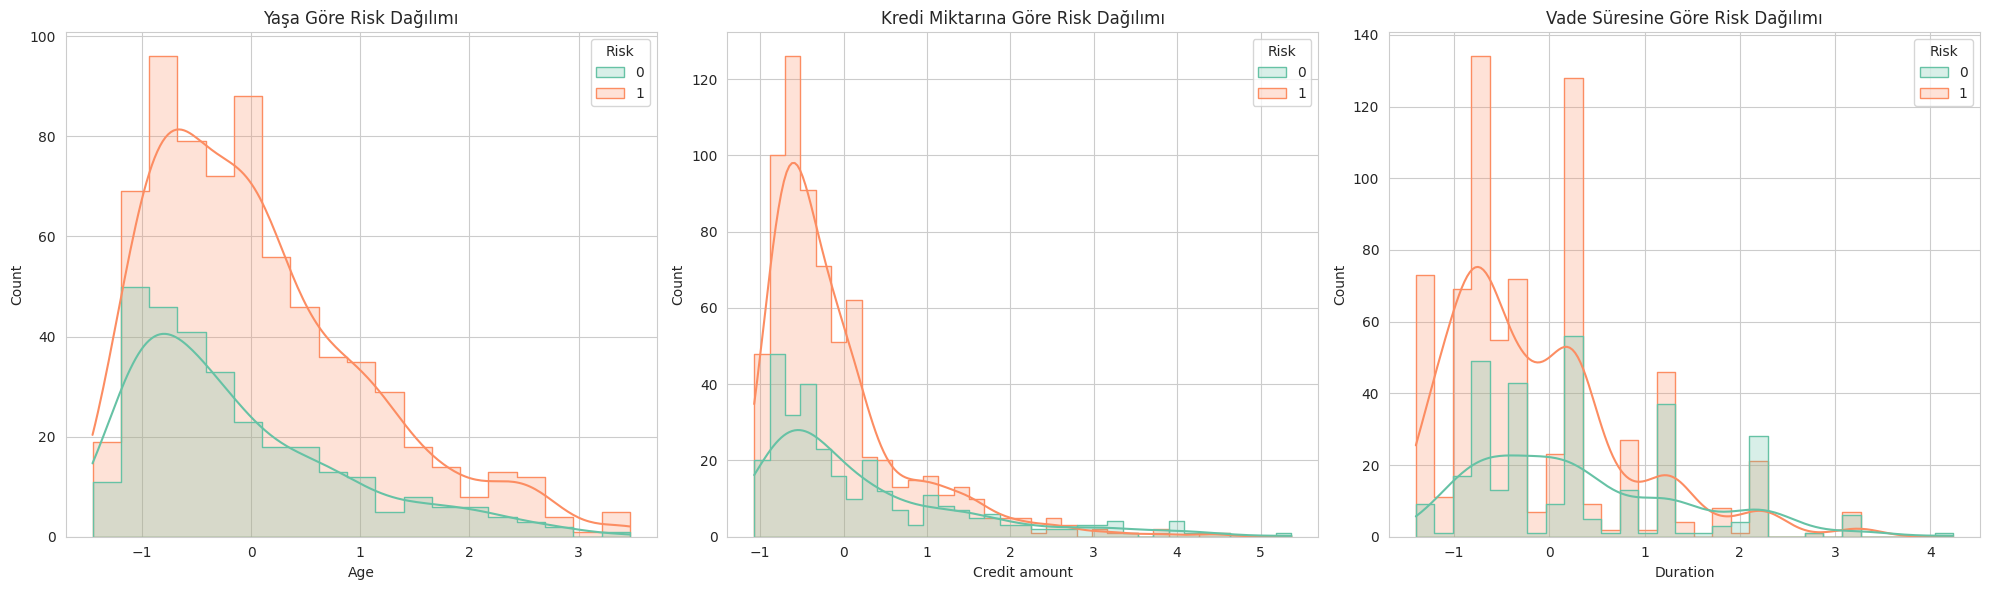

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(data=df, x='Age', hue='Risk', kde=True, element="step", ax=ax[0], palette="Set2")
ax[0].set_title('Yaşa Göre Risk Dağılımı')

sns.histplot(data=df, x='Credit amount', hue='Risk', kde=True, element="step", ax=ax[1], palette="Set2")
ax[1].set_title('Kredi Miktarına Göre Risk Dağılımı')

sns.histplot(data=df, x='Duration', hue='Risk', kde=True, element="step", ax=ax[2], palette="Set2")
ax[2].set_title('Vade Süresine Göre Risk Dağılımı')

plt.tight_layout()
plt.show()

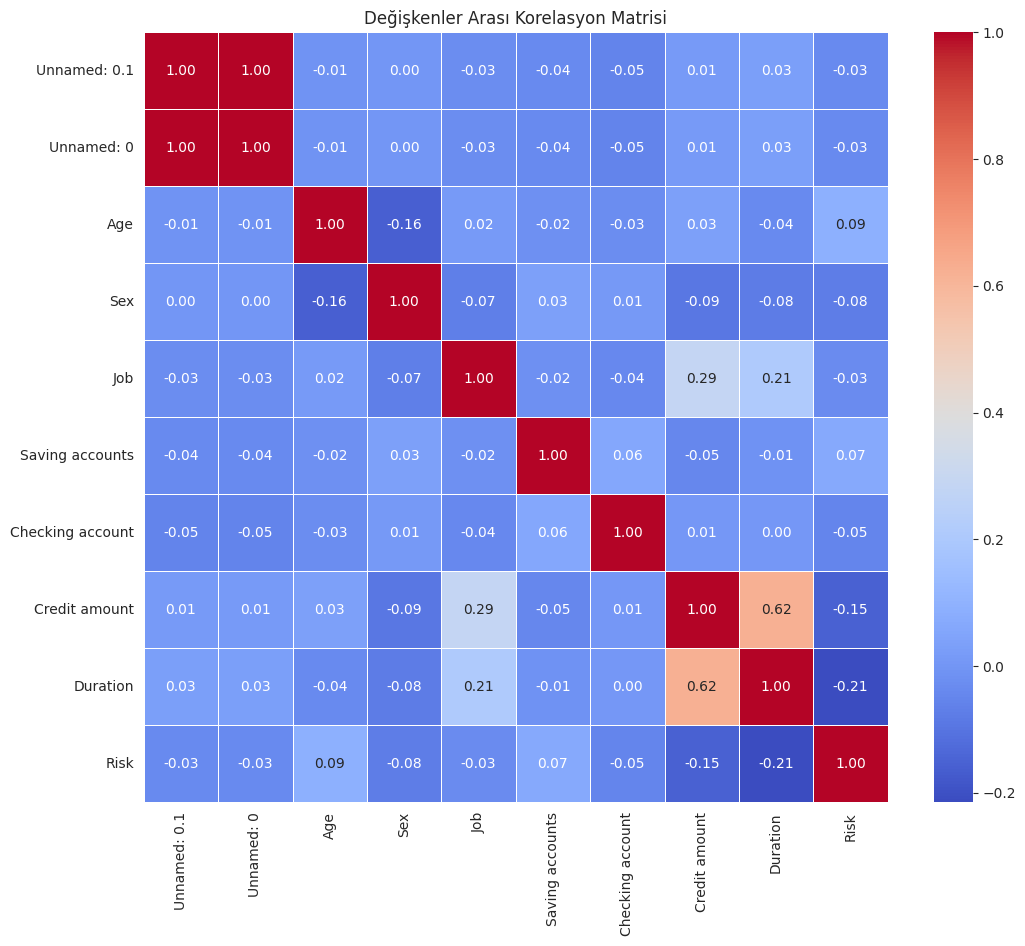

In [78]:
plt.figure(figsize=(12, 10))

numeric_df = df.select_dtypes(include=['int64', 'float64', 'uint8']) # uint8, get_dummies sonrası oluşur
correlation = numeric_df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()

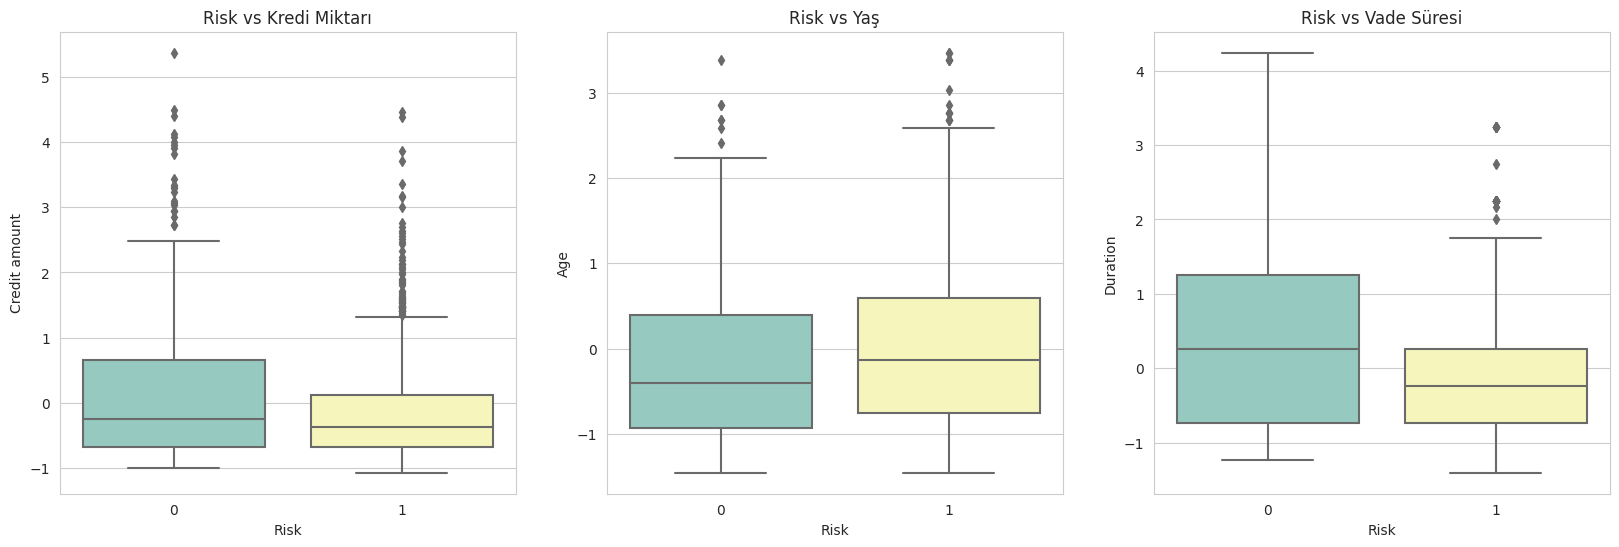

In [79]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='Risk', y='Credit amount', data=df, ax=ax[0], palette='Set3')
ax[0].set_title('Risk vs Kredi Miktarı')

sns.boxplot(x='Risk', y='Age', data=df, ax=ax[1], palette='Set3')
ax[1].set_title('Risk vs Yaş')

sns.boxplot(x='Risk', y='Duration', data=df, ax=ax[2], palette='Set3')
ax[2].set_title('Risk vs Vade Süresi')

plt.show()

In [80]:
#yaptığım ölçeklendirmeyi kontrol ediyorum

# Her bir sütunun ortalamasını kontrol et
print("Ortalama:\n", df[['Age', 'Credit amount', 'Duration']].mean())

# Her bir sütunun standart sapmasını kontrol et
print("Standart Sapma:\n", df[['Age', 'Credit amount', 'Duration']].std())

Ortalama:
 Age              5.329071e-17
Credit amount    6.661338e-17
Duration         1.136868e-16
dtype: float64
Standart Sapma:
 Age              1.0005
Credit amount    1.0005
Duration         1.0005
dtype: float64
